In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [145]:
df_loan = pd.read_csv(r'C:\Kamal\Machine Learing and AI\Course Sessions\Statistical Inference\Exploratory Data Analysis\Case_Study_1\loan.csv' , low_memory = False)

In [146]:
df_loan.shape

(39717, 111)

In [147]:
# Set right column names

df_loan = df_loan.rename(columns = {c : c.replace(' ','').replace('.','_') for c in df_loan.columns})
print(df_loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [148]:
# Check potential unique value fields 
df_colunique = pd.Series({col: len(pd.unique(df_loan[col])) for col in df_loan}).reset_index()
df_colunique[df_colunique[0] == len(df_loan)]

# Remove the columns with all nulls ## potential unique 

,index,0
0,id,39717
1,member_id,39717
18,url,39717


In [149]:
# Strip all columns for leading and lagging spaces

df_loan = df_loan.applymap(lambda s : s.strip() if type(s) is str else s)

In [150]:
# Remove the columns with all nulls 

df_loan_null = df_loan.isnull().sum(axis = 0).reset_index()
columns_to_remove = df_loan_null[df_loan_null[0] == len(df_loan) ]

print(len(df_loan.columns))

df_loan.drop(columns_to_remove['index'] , axis = 1 , inplace = True)

df_loan.columns

111


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [151]:
print(len(df_loan.columns))

57


In [152]:
# Delete unwanted columns : less data : No action here as no column has a fully null data 

df_loan_null = df_loan.isnull().sum(axis = 0).reset_index()
df_loan_null['Percent'] = df_loan_null[0] / len(df_loan) *100
df_loan_null[df_loan_null.Percent > 0].sort_values(by = 'Percent' , ascending = False).head()

,index,0,Percent
47,next_pymnt_d,38577,97.129693
29,mths_since_last_record,36931,92.985372
28,mths_since_last_delinq,25682,64.662487
19,desc,12940,32.580507
10,emp_title,2459,6.191303


In [153]:
# Delete unwanted columns :  repetition and unwanted data 

# url has no additional information 

print(df_loan[(df_loan.id.astype(str) != df_loan.url.apply(lambda s : s[s.index('=') + 1:len(s)].strip() if '=' in s else s ))])
print(df_loan.url.apply(lambda s : s[0 : s.index('=')].strip() if '=' in s else s ).unique())

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 57 columns]
['https://lendingclub.com/browse/loanDetail.action?loan_id']


In [154]:
# Remove string months from term 6 

df_loan.term = df_loan.term.apply(lambda s : s[0:s.index(' ')] if ' ' in s else s)
df_loan.term = pd.to_numeric(df_loan.term)
df_loan.term.head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64

In [155]:
# Remove % sign from interest rate 

df_loan.int_rate = df_loan.int_rate.apply(lambda s : s[0:s.index('%')] if '%' in s else s)
df_loan.int_rate = pd.to_numeric(df_loan.int_rate)
df_loan.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [156]:
df_loan.emp_length.apply(lambda s : str(s).replace('years' , '').replace(' ' , '').replace('year' , '') ).head()
#df_loan.emp_length = pd.to_numeric(df_loan.emp_length)

0    10+
1     <1
2    10+
3    10+
4      1
Name: emp_length, dtype: object

In [157]:
# Delete blank rows 
# No blank rows identified worth to be deleted 

col_count = len(df_loan.columns)
df_loan[df_loan.isnull().sum(axis = 1) / col_count * 100  > 12 ]

(df_loan.isnull().sum(axis = 1)/ col_count * 100 ).max()

14.035087719298245

In [158]:
# Identify the columns with a 0 low variance and check it they can be removed 
df_var = df_loan.var().sort_values() == 0
columns_to_remove = df_var[df_var]
print(columns_to_remove.index)

if len(columns_to_remove.index) > 0 :
    df_loan.drop(columns_to_remove.index , axis = 1 , inplace = True)
    
print(len(df_loan.columns))

Index(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths',
       'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med'],
      dtype='object')
51


In [159]:
# Identify the columns with a no unique values across 
df_non_unique = pd.Series({col: len(pd.unique(df_loan[col])) for col in df_loan}).sort_values() == 1
columns_to_remove = df_non_unique[df_non_unique]
print(columns_to_remove.index)

if len(columns_to_remove.index) > 0 :
    df_loan.drop(columns_to_remove.index , axis = 1 , inplace = True)
print(len(df_loan.columns))

Index(['initial_list_status', 'application_type', 'pymnt_plan'], dtype='object')
48


In [160]:
# identify columns which have no impact on the business or which do not give additional information 

columns_to_remove = ['url' , 'collection_recovery_fee']
df_loan.drop(columns_to_remove , axis = 1 , inplace = True)
print(len(df_loan.columns))

46


In [161]:
df_loan.to_csv(r'C:\Kamal\Machine Learing and AI\Course Sessions\Statistical Inference\Exploratory Data Analysis\Case_Study_1\reduced_data_set.csv')

In [162]:
# Find missing values in the column and identify whether update is required 

# Delete unwanted columns : less data 

# Count number of nulls

df_loan_null = df_loan.isnull().sum(axis = 0).reset_index()
df_loan_null['Percent'] = df_loan_null[0] / len(df_loan) *100
df_loan_null[df_loan_null.Percent > 0].sort_values(by = 'Percent' , ascending = False).head()


(df_loan.isnull().sum(axis = 0) / len(df_loan)).sort_values(ascending = False)

next_pymnt_d              0.971297
mths_since_last_record    0.929854
mths_since_last_delinq    0.646625
desc                      0.325805
emp_title                 0.061913
emp_length                0.027066
pub_rec_bankruptcies      0.017549
last_pymnt_d              0.001788
revol_util                0.001259
title                     0.000277
last_credit_pull_d        0.000050
funded_amnt_inv           0.000000
loan_amnt                 0.000000
member_id                 0.000000
loan_status               0.000000
issue_d                   0.000000
verification_status       0.000000
home_ownership            0.000000
annual_inc                0.000000
term                      0.000000
funded_amnt               0.000000
sub_grade                 0.000000
grade                     0.000000
installment               0.000000
int_rate                  0.000000
purpose                   0.000000
dti                       0.000000
zip_code                  0.000000
out_prncp_inv       

In [163]:
# Action on the columns with missing values 

# last payment date . The value is limited to loan status charged of . The business case will have to handled during analysis 
# Currently no action is taken on the same as it will not add any new information 
# No fix of values is required 

# No data filtering is required 


# Standardization of the values willbe handled as part of the univariate analysis 

In [164]:
# Perform Univariate Analysis

# Write Function to perform univariate analysis on categorical variables 

def uni_analysis_cat (x , ordered = False):
    sns.set(rc={'figure.figsize':(15,6)})
    f, axes = plt.subplots(1, 2)
    
    if(~ordered):
        print(x.iloc[:,0].value_counts())
        sns.countplot( x = x.iloc[:,0], data = x , ax = axes[0])
        sns.countplot( x = x.iloc[:,0], hue = x.iloc[:,1] , data = x , ax = axes[1] )
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        print('****************************************************************************************************')
        print(pd.crosstab(x.iloc[:,0] ,x.iloc[:,1] , margins = True , margins_name = 'Total' , normalize = True).round(4) * 100)

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64
****************************************************************************************************
loan_status     Charged Off  Current  Fully Paid   Total
home_ownership                                          
MORTGAGE               5.86     1.61       37.00   44.46
NONE                   0.00     0.00        0.01    0.01
OTHER                  0.05     0.00        0.20    0.25
OWN                    1.12     0.21        6.38    7.70
RENT                   7.15     1.05       39.38   47.58
Total                 14.17     2.87       82.96  100.00


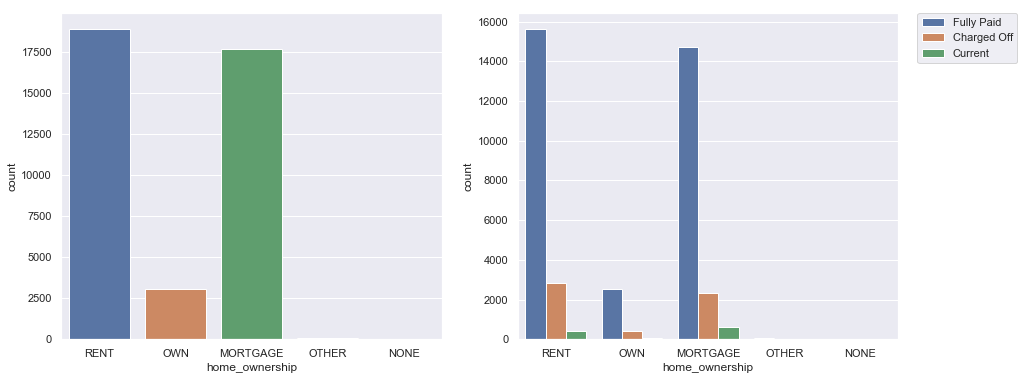

In [165]:
# Univariate analysis of Home ownership and comparison with home status

uni_analysis_cat(df_loan[['home_ownership' , 'loan_status']])

0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: inq_last_6mths, dtype: int64
****************************************************************************************************
loan_status     Charged Off  Current  Fully Paid   Total
inq_last_6mths                                          
0                      5.74     1.49       41.37   48.59
1                      4.22     0.78       22.62   27.62
2                      2.37     0.40       11.86   14.63
3                      1.56     0.16        5.95    7.67
4                      0.13     0.03        0.67    0.82
5                      0.07     0.01        0.29    0.37
6                      0.04     0.00        0.12    0.16
7                      0.03     0.00        0.06    0.09
8                      0.01     0.00        0.03    0.04
Total                 14.17     2.87       82.96  100.00


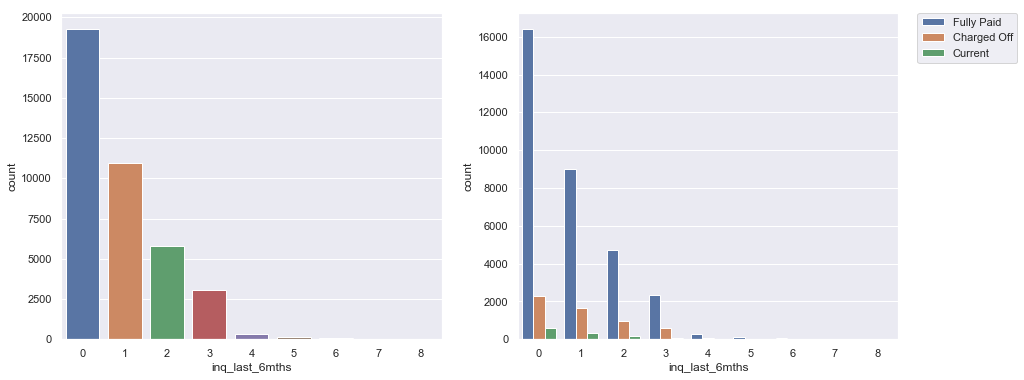

In [166]:
uni_analysis_cat(df_loan[['inq_last_6mths' , 'loan_status']])

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


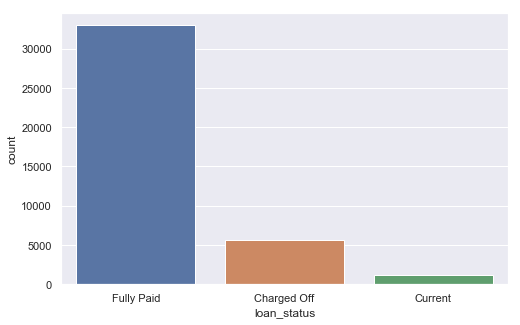

In [167]:
# Univariate analysis of Loan Status 

print(df_loan.loan_status.value_counts())

sns.set(rc={'figure.figsize':(8,5)})
sns.countplot( x = df_loan.loan_status , data = df_loan[['home_ownership' , 'loan_status']])

In [168]:
# Univariate analysis for quantitative variable 


def uni_analysis_num (x , type = 'r'):
    sns.set(rc={'figure.figsize':(15,6)})
    f, axes = plt.subplots(1, 2)
    
    print('Variable =' , x.columns[0])
    print('Mean Value ', x.iloc[:,0].mean() )
    print('Median ', x.iloc[:,0].median() )
   
    print('****************************************************************************************************')
    # print(x.iloc[:,0].value_counts())
    sns.boxplot( y = x.iloc[:,0], data = x , ax = axes[0])
    sns.violinplot( x = x.iloc[:,1], y = x.iloc[:,0] , data = x , ax = axes[1] , vert = True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #print('****************************************************************************************************')
    #print(pd.crosstab(x.iloc[:,0] ,x.iloc[:,1] , margins = True , margins_name = 'Total' , normalize = True).round(4) * 100)

Variable = installment
Mean Value  324.561922098845
Median  280.22
****************************************************************************************************


C:\Users\Kamalm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


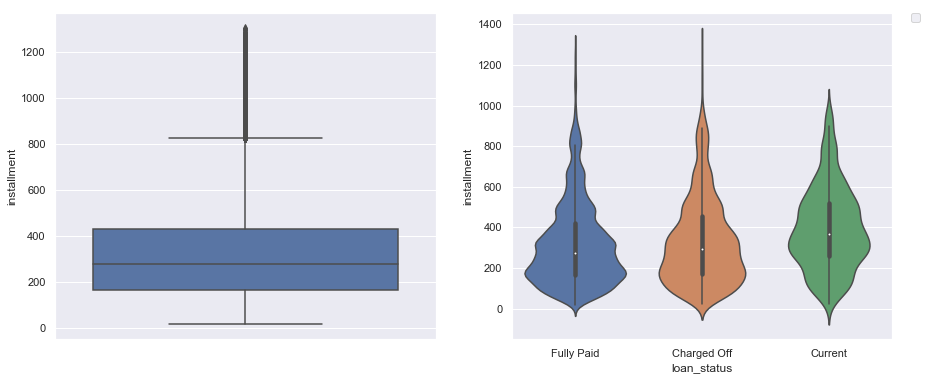

In [169]:
uni_analysis_num(df_loan[['installment' , 'loan_status']])

Variable = int_rate
Mean Value  12.02117657426169
Median  11.86
****************************************************************************************************


C:\Users\Kamalm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


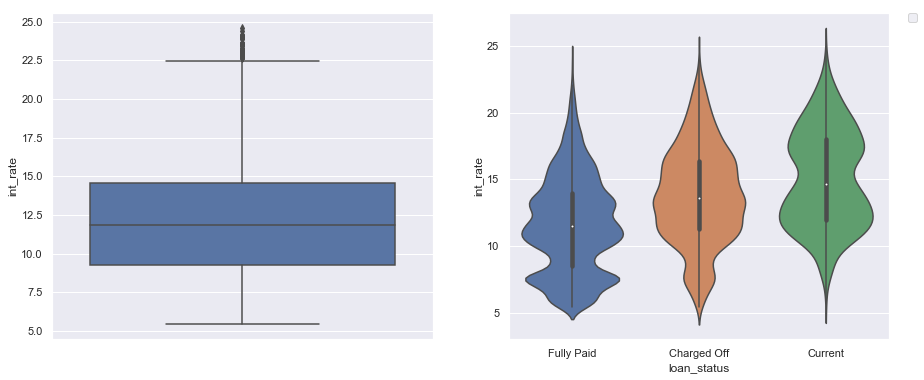

In [170]:
uni_analysis_num(df_loan[['int_rate' , 'loan_status']])

In [171]:
# In case of months , perform analysis based on both month and year 
# start with the setting the date type and then continue with the seperate analysis of Month and year 

df_loan.issue_d = pd.to_datetime(df_loan.issue_d , format = '%b-%y')

df_loan['issue_d_month'] = df_loan.issue_d.dt.month
df_loan['issue_d_year'] = df_loan.issue_d.dt.year


12    4433
11    4167
10    3934
9     3648
8     3518
7     3476
6     3279
5     2999
4     2834
3     2692
1     2379
2     2358
Name: issue_d_month, dtype: int64
****************************************************************************************************
loan_status    Charged Off  Current  Fully Paid   Total
issue_d_month                                          
1                     0.81     0.00        5.18    5.99
2                     0.73     0.00        5.21    5.94
3                     0.87     0.00        5.90    6.78
4                     0.93     0.01        6.20    7.14
5                     1.17     0.20        6.18    7.55
6                     1.22     0.25        6.79    8.26
7                     1.21     0.31        7.23    8.75
8                     1.18     0.33        7.35    8.86
9                     1.38     0.38        7.43    9.18
10                    1.46     0.44        8.01    9.91
11                    1.51     0.41        8.58   10.49
12   

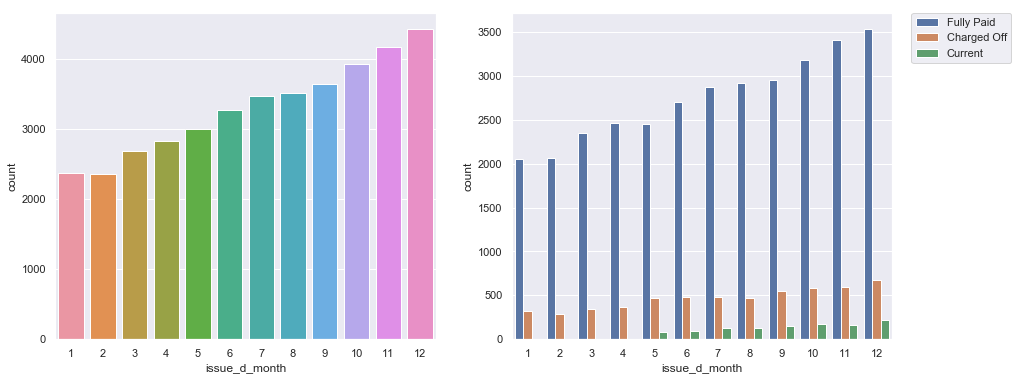

In [175]:
# Univariate analysis considering the month of the loan issue 
# Here we see that delinquency increases witht the later months when loans may have increase just to meet the target numbers

uni_analysis_cat(df_loan[['issue_d_month' , 'loan_status']])

2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_d_year, dtype: int64
****************************************************************************************************
loan_status   Charged Off  Current  Fully Paid   Total
issue_d_year                                          
2007                 0.11     0.00        0.52    0.63
2008                 0.62     0.00        3.31    3.93
2009                 1.50     0.00       10.38   11.87
2010                 3.74     0.00       25.30   29.04
2011                 8.20     2.87       43.46   54.53
Total               14.17     2.87       82.96  100.00


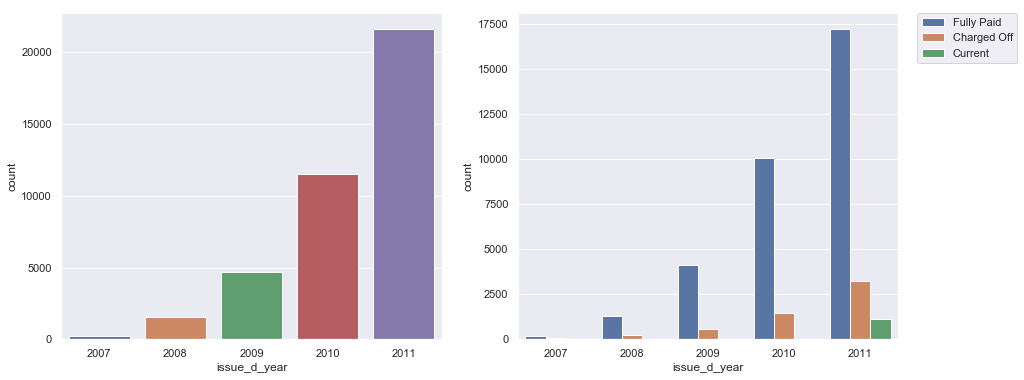

In [174]:
# Univariate analysis considering the month of the loan issue 
# Here we see that delinquency increases witht the later yeas for growth when loans may have increase just to meet the target numbers
# Year 2011 is particularly alarming 

uni_analysis_cat(df_loan[['issue_d_year' , 'loan_status']])

In [256]:
def bubble_plot(x , y , z ,count):
    plt.rcParams.update({'font.size': 12})

    plt.figure(figsize=(10, 6))
    
    plt.scatter(x = x
                , y = y , 
                s = ((count / sum(count)).round(4) * 100 )* 100,
                c = 'r',
               alpha = 0.8)

    
    for i in range(0,len(x)):
        plt.text(x[i] ,y[i], count[i] , ha = 'left', va = 'center', fontsize = 12)

    plt.show()

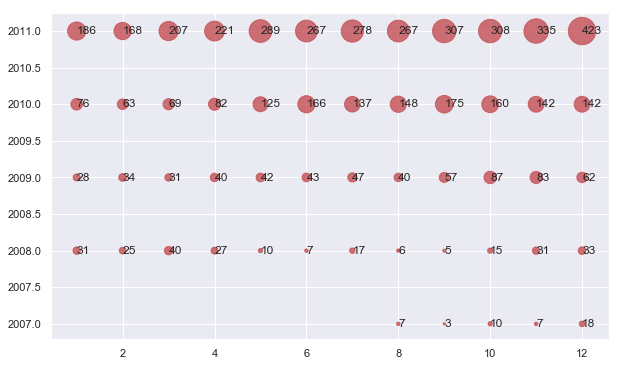

In [257]:
# Undertake the scatter plot for the charged Off variables

df_issue_d = df_loan.loc[df_loan.loan_status == 'Charged Off' , ['issue_d_year' , 'issue_d_month' , 'loan_status']].groupby(['issue_d_year' , 'issue_d_month' , 'loan_status']).size().reset_index()

bubble_plot(df_issue_d.issue_d_month , df_issue_d.issue_d_year , df_issue_d.loan_status , df_issue_d[0])